<a href="https://colab.research.google.com/github/lukasz86s/Machine_learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

#load data


In [ ]:
raw_data = datasets.load_digits()
raw_data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
data = raw_data.data
target = raw_data.target
print(data.shape)
print(target.shape)
image = raw_data.images
image.shape

(1797, 64)
(1797,)


(1797, 8, 8)

#display data

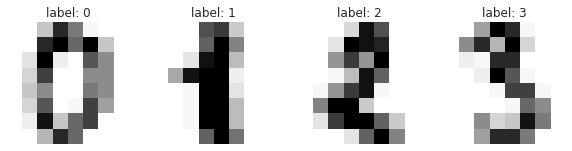

In [ ]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(image, target))[:4]):
  plt.subplot(1, 4, index+1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f"label: {label}")


#data preparation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target)

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (1347, 64)
x_test shape (450, 64)
y_train shape (1347,)
y_test shape (450,)


#model training

In [ ]:
from sklearn.svm import SVC

classifiler = SVC(gamma=0.001)
classifiler.fit(x_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifiler.predict(x_test)

In [ ]:
d = np.c_[y_test, y_pred]
df = pd.DataFrame(data=d, columns=['y_test', 'y_pred'])
corr = classifiler.score(x_test, y_test)
corr
err = df[df.y_test != df.y_pred]
err

,y_test,y_pred
300,8,1
314,9,3
383,9,7


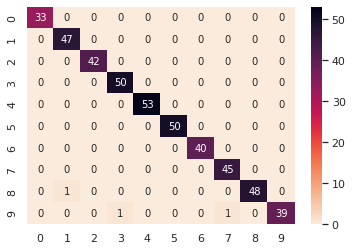

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='rocket_r')

In [ ]:

ff.create_annotated_heatmap(cm, colorscale='Ice', reversescale=True)